# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

If you want to remap external input that was removed to a new position, then use ```remap_removed_input = True```

In [1]:
import os

network_path = os.path.join("networks","PD-example-2")
#network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 200
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20221213")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")

# Do we want to remap removed input?
remap_removed_input = False
remapped_fraction = 0.0

# Do we want to remap removed input?
#remap_removed_input = True
#remapped_fraction = 0.9

rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Adding Striatum with 200 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0/neurons/striatum/fs/2/mec

In [3]:
from snudda import Snudda
snd_pd0 = Snudda(network_path=network_path_pd0)
snd_pd0.create_network()

Placing neurons
Network path: networks/PD-example-2/PD0
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Generating 1342 points for networks/PD-example-2/PD0/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
n_points = 1277, previous close_pairs = 2475
n_points = 1215, previous close_pairs = 2051
n_points = 1156, previous close_pairs = 1688
n_points = 1101, previous close_pairs = 1410
n_points = 1049, previous close_pairs = 1180
n_points = 1000, previous close_pairs = 993
n_points = 955, previous close_pairs = 832
n_points = 913, previous close_pairs = 703
n_points = 874, previous close_pairs = 587
n_points = 838, previous close_pairs = 477
n_points = 805, previous close_pairs = 409
n_points = 776, previous close_pairs = 345
n_points = 750, previous close_pairs = 289
n_points = 727, previous close_pairs = 242
n_points = 725, previous close_pairs = 202
n_points = 527, previous close_pairs = 198
Filtering 527

In [4]:
snd_pd0.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Writing input spikes to networks/PD-example-2/PD0/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Writing spikes to networks/PD-example-2/PD0/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 21.9s


## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [5]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 200 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/mec

In [6]:
from snudda import Snudda
snd_pd2_ref = Snudda(network_path=network_path_pd2_ref)
snd_pd2_ref.create_network()

Placing neurons
Network path: networks/PD-example-2/PD2-ref
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2/PD2-ref/network-config.json
Generating 1342 points for networks/PD-example-2/PD2-ref/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
n_points = 1277, previous close_pairs = 2475
n_points = 1215, previous close_pairs = 2051
n_points = 1156, previous close_pairs = 1688
n_points = 1101, previous close_pairs = 1410
n_points = 1049, previous close_pairs = 1180
n_points = 1000, previous close_pairs = 993
n_points = 955, previous close_pairs = 832
n_points = 913, previous close_pairs = 703
n_points = 874, previous close_pairs = 587
n_points = 838, previous close_pairs = 477
n_points = 805, previous close_pairs = 409
n_points = 776, previous close_pairs = 345
n_points = 750, previous close_pairs = 289
n_points = 727, previous close_pairs = 242
n_points = 725, previous close_pairs = 202
n_points = 527, previous close_pairs = 198
F

In [7]:
snd_pd2_ref.setup_input(input_config=input_config)

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2/PD2-ref/network-config.json
Writing input spikes to networks/PD-example-2/PD2-ref/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2/PD2-ref/network-config.json
Writing spikes to networks/PD-example-2/PD2-ref/input-spikes.hdf5
stop_parallel disabled, to keep pool running.

Execution time: 18.2s


## Degenerating the PD0 network to get PD2 network

In [8]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file(remap_removed_input=remap_removed_input, remapped_fraction=remapped_fraction)
swap.close()

Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/optim_chin_morph_renamed2019-11-08.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2/neurons/striatum/lts/0/lts_morp_9862_centered_no_axon_resampled-var0.swc-cache.pickle
Writing new network to networks/PD-example-2/PD2/network-synapses.hdf5
Loading synapses into memory.
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD3/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/h

## Plotting of a degenerated neuron

In [9]:
# This is so we get the most central dSPN in the network
from snudda import SnuddaLoad
sl = SnuddaLoad(network_path_pd0)
neuron_id = list(sl.get_centre_neurons_iterator(neuron_type="dSPN", n_neurons=1))[0][0]

In [10]:
# neuron_id = 55
neuron_id

63

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses


/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:118: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=coords[:, 0], ys=coords[:, 1], zs=coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.py:125: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=syn_coords[:, 0], ys=syn_coords[:, 1], zs=syn_coords[:, 2],
/home/hjorth/HBP/Snudda/snudda/plotting/plot_input_locations.p

Figure written: networks/PD-example-2/PD0/figures/input-to-63-dSPN_16-and-internal-synapses.png


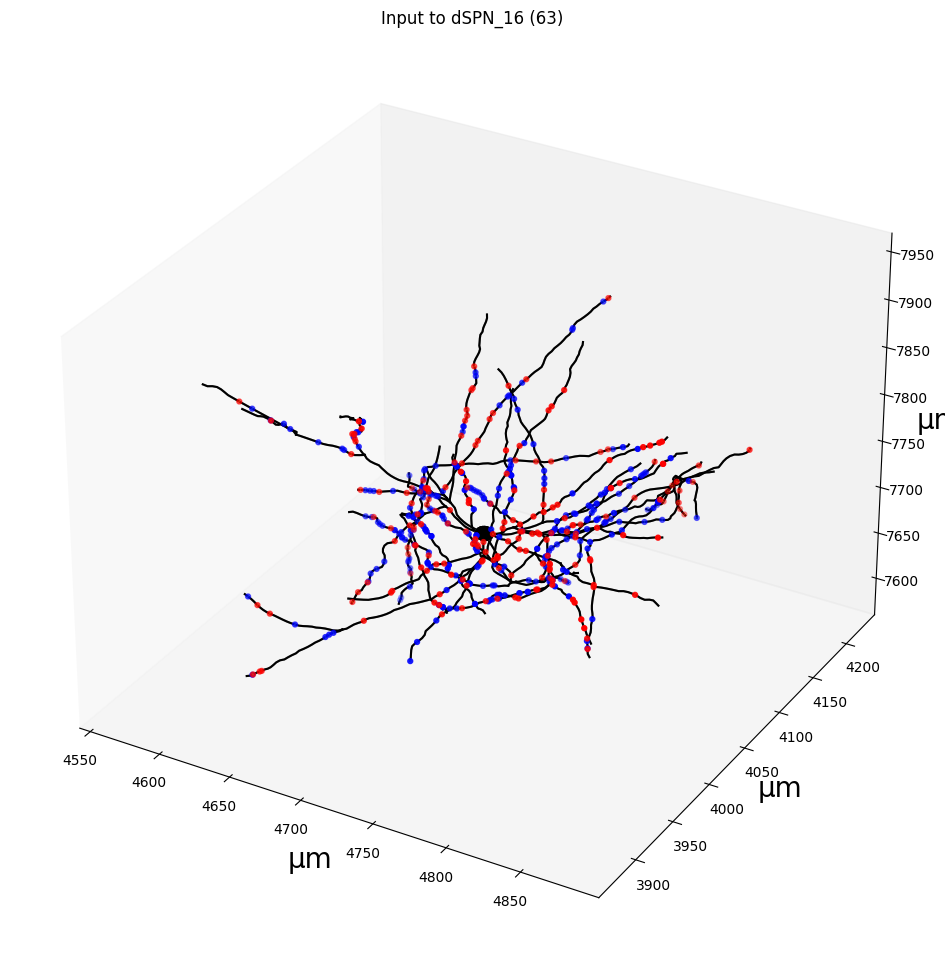

In [11]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

# Note here original and degenerate path were the same, so we are plotting the full neuron and its synapses.
pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd0)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)
#internal synapses are blue
#external synapses are red

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2/PD2/network-synapses.hdf5
Plotting 200 external synapses
Plotting 119 external synapses
Figure written: networks/PD-example-2/PD2/figures/input-to-63-dSPN_16-and-internal-synapses.png


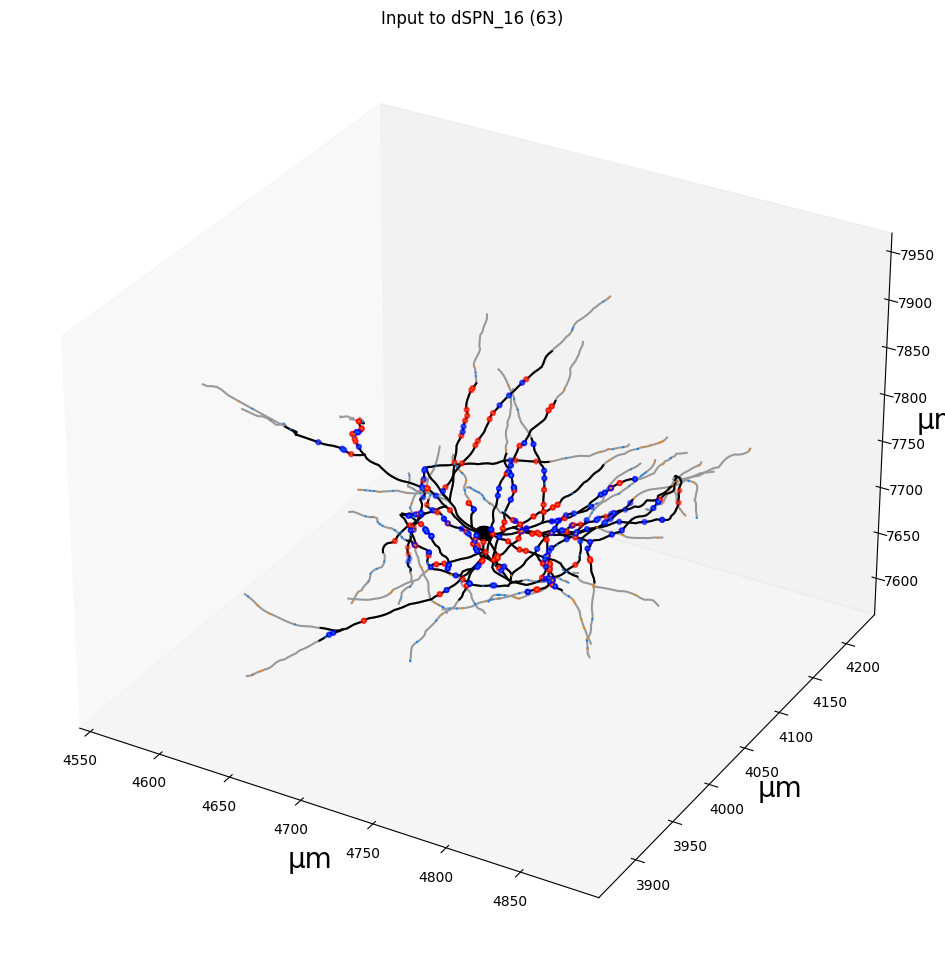

In [12]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD0 from networks/PD-example-2/PD0/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20221213/PD2 from networks/PD-example-2/PD2-ref/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses
Figure written: networks/PD-example-2/PD2-ref/figures/input-to-63-dSPN_16-and-internal-synapses.png


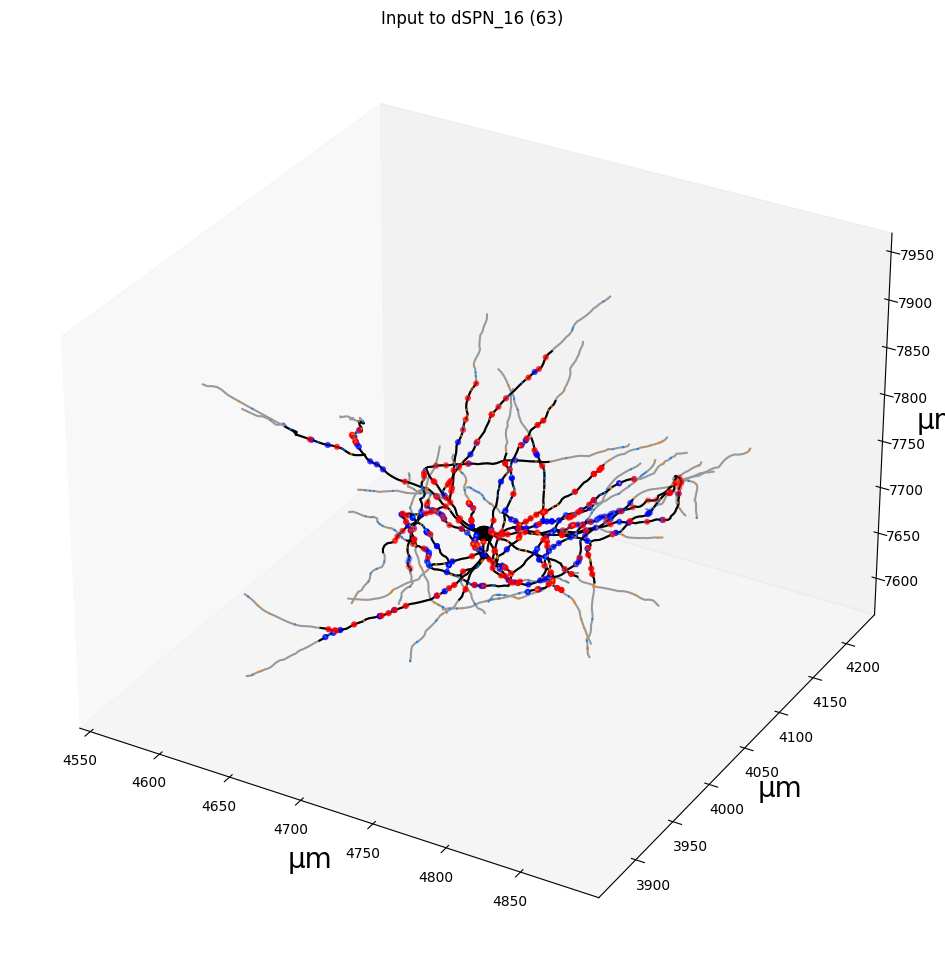

In [13]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2_ref)
#neuron_id = 55
pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True, hide_axis=False)

In [14]:
from snudda.analyse.analyse_input import AnalyseInput

pd0_input_info = AnalyseInput(input_file=input_pd0, network_path=network_path_pd0)
pd2_input_info = AnalyseInput(input_file=input_pd2, network_path=network_path_pd2)

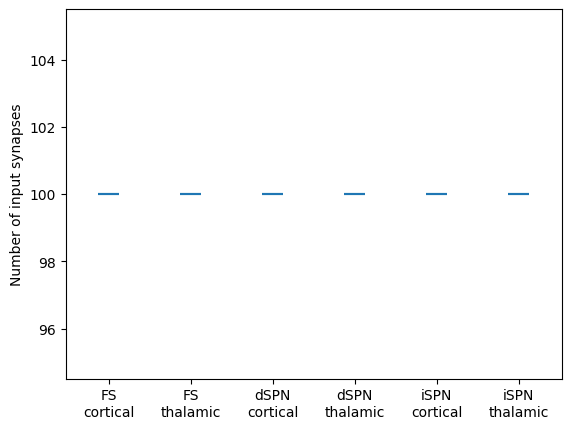

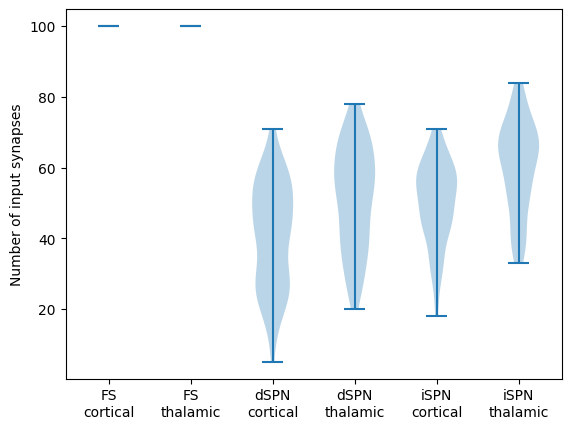

In [15]:
pd0_input_info.plot_input_count("PD0-input_example.png")
pd2_input_info.plot_input_count("PD2-input_example.png")

In [16]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 199 neurons with 20225 synapses and 0 gap junctions
Load done. 0.0
ChIN -> dSPN: 139 synapses
ChIN -> iSPN: 101 synapses
FS -> dSPN: 321 synapses
FS -> iSPN: 184 synapses
LTS -> dSPN: 10 synapses
LTS -> iSPN: 6 synapses
dSPN -> ChIN: 13 synapses
dSPN -> dSPN: 4308 synapses
dSPN -> iSPN: 965 synapses
iSPN -> ChIN: 8 synapses
iSPN -> dSPN: 5368 synapses
iSPN -> iSPN: 8802 synapses

PD2
Loading networks/PD-example-2/PD2/network-synapses.hdf5
Loading config data from HDF5
Loading 199 neurons with 8064 synapses and 0 gap junctions
Load done. 0.0
ChIN -> dSPN: 13 synapses
ChIN -> iSPN: 13 synapses
FS -> dSPN: 286 synapses
FS -> iSPN: 513 synapses
LTS -> dSPN: 4 synapses
dSPN -> ChIN: 13 synapses
dSPN -> dSPN: 1319 synapses
dSPN -> iSPN: 371 synapses
iSPN -> ChIN: 9 synapses
iSPN -> dSPN: 1616 synapses
iSPN -> iSPN: 3907 synapses

PD2 degenerated
Loading networks/PD-example-2/PD2-ref/network-synap

0

In [17]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --listPre {neuron_id}"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 199 neurons with 20225 synapses and 0 gap junctions
Load done. 0.0
List neurons pre-synaptic to neuron_id = 63 (dSPN_16)
The neuron receives 284 synapses
1 : dSPN_17 (3 synapses)
2 : dSPN_29 (2 synapses)
4 : iSPN_31 (3 synapses)
7 : dSPN_28 (3 synapses)
8 : dSPN_33 (4 synapses)
12 : iSPN_3 (3 synapses)
13 : iSPN_6 (3 synapses)
14 : iSPN_12 (4 synapses)
17 : iSPN_2 (7 synapses)
19 : iSPN_35 (6 synapses)
21 : iSPN_11 (4 synapses)
24 : dSPN_31 (3 synapses)
25 : iSPN_29 (4 synapses)
26 : dSPN_7 (3 synapses)
28 : iSPN_27 (3 synapses)
30 : dSPN_31 (3 synapses)
34 : iSPN_15 (4 synapses)
35 : dSPN_22 (3 synapses)
46 : iSPN_32 (3 synapses)
47 : iSPN_1 (3 synapses)
48 : iSPN_26 (3 synapses)
60 : iSPN_12 (4 synapses)
61 : iSPN_28 (3 synapses)
66 : iSPN_25 (4 synapses)
67 : iSPN_34 (4 synapses)
70 : iSPN_1 (4 synapses)
71 : iSPN_6 (5 synapses)
72 : iSPN_18 (5 synapses)
73 : dSPN_14 (2 synapses)
76 : iS

0

Added: 11, removed: 134, kept: 120


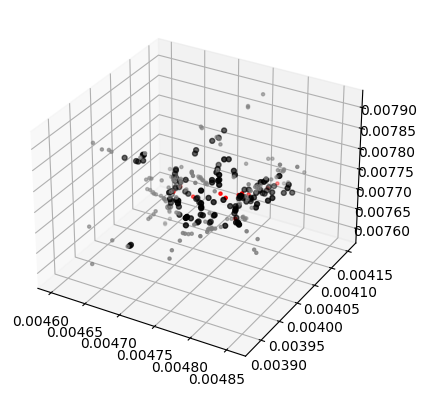

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [18]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

Added: 110, removed: 224, kept: 30


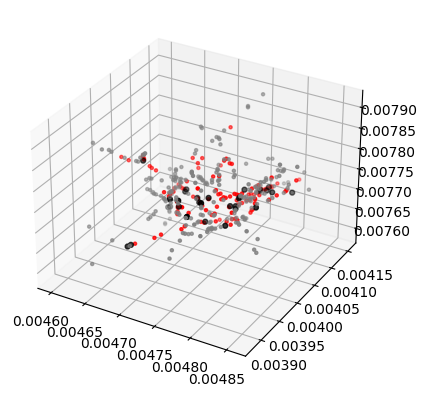

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

In [19]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2_ref, 
                                neuron_id=neuron_id)
pdg.plot_synapses()